In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim

Linear Regression RMSE:
Train: 0.48501604605823356, Validation: 0.47947839142005066, Test: 0.4812015354376131


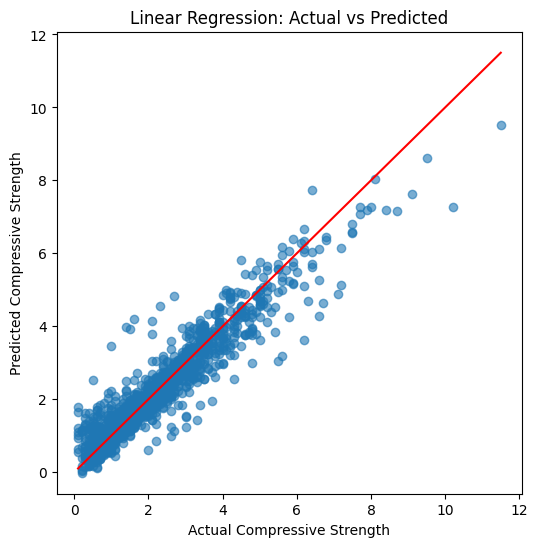

In [14]:
df = pd.read_csv("AirQuality.csv")
train_data, temp_data = train_test_split(df, test_size=0.4, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

X_train, y_train = train_data.iloc[:, :-1].values, train_data["CO"].values
X_val, y_val = val_data.iloc[:, :-1].values, val_data["CO"].values
X_test, y_test = test_data.iloc[:, :-1].values, test_data["CO"].values
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_train_pred = lin_reg.predict(X_train)
y_val_pred = lin_reg.predict(X_val)
y_test_pred = lin_reg.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Linear Regression RMSE:\nTrain: {rmse_train}, Validation: {rmse_val}, Test: {rmse_test}")


plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.xlabel("Actual Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.show()